In [5]:
import pandas as pd

df = pd.read_csv("dataset_kualitas_kopi.csv")
df

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk
...,...,...,...,...
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk


In [8]:
df.tail

<bound method NDFrame.tail of      Kadar Kafein  Tingkat Keasaman Jenis Proses Kualitas Kopi
0       71.676050          4.505419        Honey         Buruk
1       89.899105          4.777716        Honey         Buruk
2      101.782740          5.987926       Washed        Sedang
3      112.958351          5.145615      Natural          Baik
4       68.571363          4.934300        Honey         Buruk
..            ...               ...          ...           ...
295    105.346259          5.511636       Washed        Sedang
296    114.917455          5.150439      Natural          Baik
297     99.558838          5.612135       Washed        Sedang
298     88.621531          4.803087        Honey         Buruk
299     98.192872          5.504599       Washed        Sedang

[300 rows x 4 columns]>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kadar Kafein      300 non-null    float64
 1   Tingkat Keasaman  300 non-null    float64
 2   Jenis Proses      300 non-null    object 
 3   Kualitas Kopi     300 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [14]:
df.head

<bound method NDFrame.head of      Kadar Kafein  Tingkat Keasaman Jenis Proses Kualitas Kopi
0       71.676050          4.505419        Honey         Buruk
1       89.899105          4.777716        Honey         Buruk
2      101.782740          5.987926       Washed        Sedang
3      112.958351          5.145615      Natural          Baik
4       68.571363          4.934300        Honey         Buruk
..            ...               ...          ...           ...
295    105.346259          5.511636       Washed        Sedang
296    114.917455          5.150439      Natural          Baik
297     99.558838          5.612135       Washed        Sedang
298     88.621531          4.803087        Honey         Buruk
299     98.192872          5.504599       Washed        Sedang

[300 rows x 4 columns]>

In [30]:
df["Kualitas Kopi"].value_counts()

Kualitas Kopi
Baik      103
Buruk      99
Sedang     98
Name: count, dtype: int64

In [19]:
df.shape

(300, 4)

In [21]:
df.columns

Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')

In [23]:
df.describe()

,Kadar Kafein,Tingkat Keasaman
count,300.000000,300.000000
mean,94.880478,5.255010
std,18.612343,0.423348
min,60.340609,4.505419
25%,80.885090,4.912739
50%,96.469407,5.249464
75%,108.570401,5.622462
max,129.569514,5.995027


In [27]:
df.dtypes

Kadar Kafein        float64
Tingkat Keasaman    float64
Jenis Proses         object
Kualitas Kopi        object
dtype: object

In [29]:
df.info

<bound method DataFrame.info of      Kadar Kafein  Tingkat Keasaman Jenis Proses Kualitas Kopi
0       71.676050          4.505419        Honey         Buruk
1       89.899105          4.777716        Honey         Buruk
2      101.782740          5.987926       Washed        Sedang
3      112.958351          5.145615      Natural          Baik
4       68.571363          4.934300        Honey         Buruk
..            ...               ...          ...           ...
295    105.346259          5.511636       Washed        Sedang
296    114.917455          5.150439      Natural          Baik
297     99.558838          5.612135       Washed        Sedang
298     88.621531          4.803087        Honey         Buruk
299     98.192872          5.504599       Washed        Sedang

[300 rows x 4 columns]>

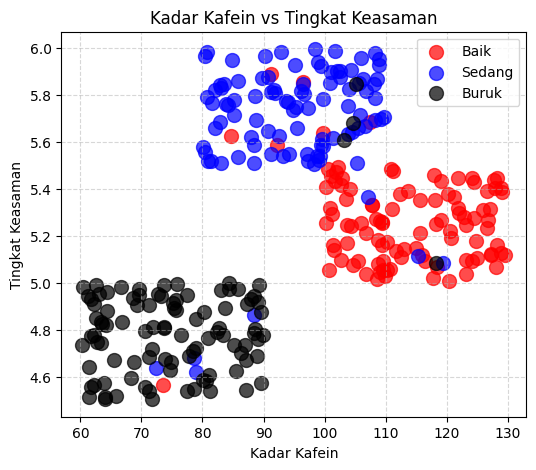

In [34]:
import matplotlib.pyplot as plt

Baik = df[df["Kualitas Kopi"]=="Baik"]
Sedang = df[df["Kualitas Kopi"]=="Sedang"]
Buruk = df[df["Kualitas Kopi"]=="Buruk"]


plt.figure(figsize=(6,5))

plt.scatter(Baik["Kadar Kafein"], Baik["Tingkat Keasaman"], s=100, alpha=0.7, color="red", label="Baik")
plt.scatter(Sedang["Kadar Kafein"], Sedang["Tingkat Keasaman"], s=100, alpha=0.7, color="blue", label="Sedang")
plt.scatter(Buruk["Kadar Kafein"], Buruk["Tingkat Keasaman"], s=100, alpha=0.7, color="black", label="Buruk")

plt.xlabel("Kadar Kafein")
plt.ylabel("Tingkat Keasaman")
plt.title("Kadar Kafein vs Tingkat Keasaman")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#siapkan bahan
X = df[["Kadar Kafein", "Tingkat Keasaman","Jenis Proses"]]
y = df["Kualitas Kopi"]

#pisahkan dataset untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#pisahkan dataset untuk train dan test
numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]

# siapkan pemrosesan awal (preprpocessing)
preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
    ]
)

#siapkan pipeline
model = Pipeline(
    steps=[
        ("prepprocessing", preprocessing),
        ("model", LogisticRegression()),
    ]
)

#suruh model alias otak untuk belajar
model.fit(X_train, y_train)

#suruh otak ulangan, catat hasil jawabannya
y_pred = model.predict(X_test)

#bandingkan kunci jawaban dengan jawaban otak
print("akurasi :", accuracy_score(y_test, y_pred))

print("\nClassification Report\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))

akurasi : 0.9666666666666667

Classification Report
               precision    recall  f1-score   support

        Baik       1.00      0.94      0.97        18
       Buruk       0.96      1.00      0.98        26
      Sedang       0.94      0.94      0.94        16

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix
 [[17  0  1]
 [ 0 26  0]
 [ 0  1 15]]


In [70]:
data_baru = pd.DataFrame([[110, 4.5, "Honey"]],
                         columns=["Kadar Kafein","Tingkat Keasaman","Jenis Proses"])
model.predict(data_baru)[0]
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"Prediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Prediksi Baik dengan tingkat keyakinan 51.12%


In [75]:
import joblib

joblib.dump(model, "model_klasifikasi_kualitas_kopi.joblib")

['model_klasifikasi_kualitas_kopi.joblib']